In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
file = os.path.join("..","..","pollution_us_2000_2016.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
df = df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [4]:
cleanDF = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
cleanDF = cleanDF.dropna(axis='rows') 
cleanDF = cleanDF[cleanDF.State!='Country Of Mexico']
cleanDF['Date Local'] = pd.to_datetime(cleanDF['Date Local'],format='%Y-%m-%d')
cleanDF = cleanDF.groupby(['State','Date Local']).mean()
cleanDFgroup = cleanDF.groupby(level=0)
cleanDF

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0
        2013-12-06      9.0     6.0      0.0     2.0
        2013-12-07      8.0     9.0      0.0     2.0
        2013-12-08      9.0     0.0      4.0     3.0
        2013-12-09      8.0     7.0      0.0     3.0
        2013-12-10     26.0    19.0      1.0     3.0
        2013-12-11     26.0    17.0     17.0     5.0
        2013-12-12     26.0    25.0     11.0     3.0
        2013-12-13     33.0    18.0     17.0     6.0
        2013-12-14     20.0    20.0      7.0     2.0
        2013-12-15      8.0    20.0      0.0     1.0
        2013-12-16     38.0    19.0      1.0     6.0
        2013-12-17     33.0    30.0      1.0     7.0
        2013-12-18     37.0    25.0     16.0     3.0
        2013-12-19     28.0    28.0      4.0     9.0
        2013-12-20     13.0    28.0      3.0     2.0
        2013-12-21      8.0    24.0      0.0     1.0
        2013-12-22     13.0    27.0      1.0     2.0
        2013-12-23      7.0    18.0      0.0     2.0
        2013-12-24      8.0    27.0      0.0     3.0
        2013-12-25     22.0    26.0      7.0     6.0
        2013-12-26     25.0    28.0     50.0     8.0
        2013-12-27     27.0    26.0     27.0     6.0
        2013-12-28     24.0    15.0     11.0     7.0
        2013-12-29     24.0    22.0      0.0     5.0
        2013-12-30     19.0    10.0      6.0     6.0
...                     ...     ...      ...     ...
Wyoming 2016-03-01      3.0    43.0      0.0     1.0
        2016-03-02      1.0    44.0      0.0     1.0
        2016-03-03     10.0    48.0      0.0     2.0
        2016-03-04     16.0    41.0      0.0     1.0
        2016-03-05     33.0    41.0      1.0     1.0
        2016-03-06      3.0    45.0      0.0     1.0
        2016-03-07     11.0    36.0      0.0     1.0
        2016-03-08      8.0    40.0      0.0     1.0
        2016-03-09     18.0    42.0      0.0     1.0
        2016-03-11     19.0    45.0      0.0     1.0
        2016-03-12     10.0    43.0      4.0     1.0
        2016-03-13      3.0    43.0      0.0     1.0
        2016-03-14     17.0    45.0      0.0     1.0
        2016-03-15      1.0    41.0      0.0     1.0
        2016-03-16      2.0    44.0      0.0     1.0
        2016-03-17      3.0    44.0      0.0     1.0
        2016-03-18      2.0    39.0      0.0     1.0
        2016-03-19      4.0    40.0      0.0     1.0
        2016-03-20     23.0    44.0      0.0     1.0
        2016-03-21     18.0    49.0      0.0     1.0
        2016-03-22     25.0    47.0      1.0     1.0
        2016-03-23      2.0    39.0      0.0     1.0
        2016-03-24      8.0    45.0      0.0     1.0
        2016-03-25      9.0    45.0      0.0     1.0
        2016-03-26     25.0    38.0      0.0     1.0
        2016-03-27     22.0    46.0      0.0     1.0
        2016-03-28     21.0    48.0      0.0     1.0
        2016-03-29      3.0    37.0      0.0     1.0
        2016-03-30      1.0    44.0      0.0     1.0
        2016-03-31      1.0    44.0      0.0     1.0

[144721 rows x 4 columns]

In [16]:
import matplotlib.patches as mpatches
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

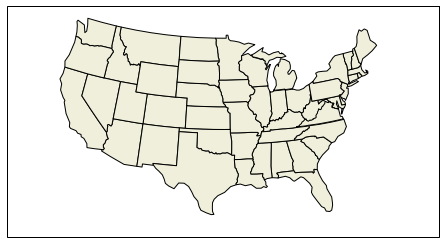

In [23]:
ax = plt.axes([0,0,1,1],projection=ccrs.LambertConformal())
ax.set_extent([-125,-66.5,20,50],ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

for state in shpreader.Reader(states_shp).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = [0.9375, 0.9375, 0.859375]
        edgecolor = 'black'
        
        
        
        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
